# CNN 구현 :  fashion_mnist dataset 사용
### label : class
* 0 : T-shirt
* 1 : Trouser
* 2 : Pullover
* 3 : Dress
* 4 : Coat
* 5 : Sandal
* 6 : Shirt
* 7 : Sneaker
* 8 : Bag
* 9 : Ankle Boot

In [3]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # library for data preprocessing
from torch.utils.data import Dataset, DataLoader

In [4]:
# CPU/GPU 장치 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
# fasion_mnist 데이터셋 내려받기
train_dataset = torchvision.datasets.FashionMNIST("./data",download=True,transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("./data",download=True,train=False,transform=transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [19]:
print(train_dataset)
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [20]:
# fashion_mnist 데이터를 DataLoader에 전달 : 내려받은 fashion_mnist 데이터를 메모리로 불러오기 위함
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=100)

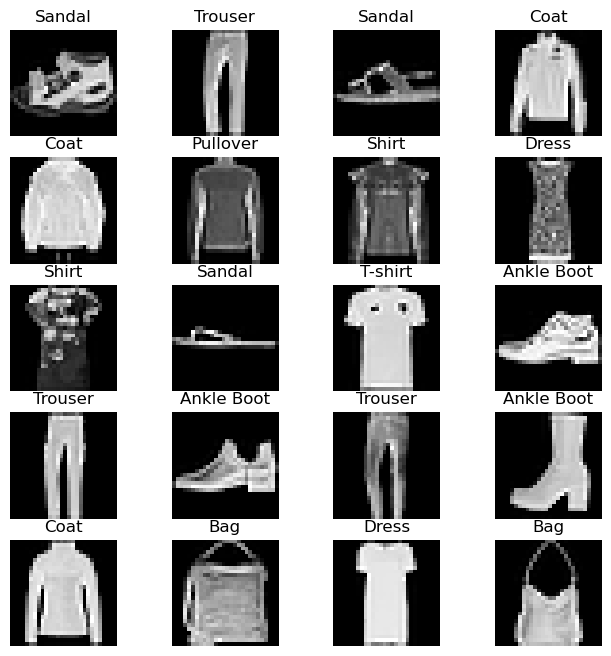

In [23]:
# 분류에 사용될 클래스 정의
labels_map = {0:'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1,columns*rows+1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows,columns,i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img,cmap='gray')
plt.show()